<a href="https://colab.research.google.com/github/Username0515/jetbot_autopilot/blob/2021-07-21-1/image.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import cv2
from matplotlib import pyplot as plt
import sys
road_partical=[]


src = cv2.imread("/content/photo/road_1.png", cv2.IMREAD_COLOR)


if src is None:
    print('Image load failed!')
    sys.exit()

black_src = cv2.imread("/content/photo/black_background.png", cv2.IMREAD_COLOR)
src2 = cv2.resize(src, dsize=(120, 120))
black_src2 = cv2.resize(black_src, dsize=(120, 120)) 
dst = cv2.Canny(src2, 30, 200)                       #임계값은 시험적으로       

contours, hierarchy = cv2.findContours(dst, cv2.RETR_CCOMP, cv2.CHAIN_APPROX_NONE)
i=0
print(len(contours))

#각 요소 보기
for cnt in contours[:]:
    #if len(cnt) >=20:
      cv2.drawContours(black_src2, [cnt], 0, (255, 255, 255), 1)     
      # black_src2 = cv2.resize(black_src, dsize=(120, 120))          #하나씩만 검출시
      i+=1
plt.imshow(black_src2)
plt.title("Total image  :::: num of partical {}".format(i))
plt.show()

import glob
road_data = [cv2.imread(file) for file in glob.glob("path/to/files/*.png")]


contours_with_filter=[]
i=0
numoftime=0

for cnt in contours:
    if len(cnt) >=20: #잡영제거 
      black_src2 = cv2.resize(black_src, dsize=(120, 120))
      
      contours_with_filter.append(cnt)
      cv2.drawContours(black_src2, [cnt], 0, (255, 255, 255), 1)     
      plt.imshow(black_src2)
      plt.suptitle("num of partical ::{}".format(i))
      plt.title("size of contour :: {}".format(len(cnt)))
      plt.show() 
      road_partical.append(black_src2)
      
      #저장하기
      # cv2.imwrite('/content/photo/road_partical_{}_{}.png'.format(numoftime,i), black_src2)
      i+=1



#마지막만 보기

"""  
for cnt in contours[:]:
    cv2.drawContours(black_src2, [cnt], 0, (255, 255, 255), 1)     
    # black_src2 = cv2.resize(black_src, dsize=(120, 120))          #하나씩만 검출시
    i+=1
plt.imshow(black_src2)
plt.title(i)
plt.show()
"""

Image load failed!


SystemExit: ignored

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2890: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


# 드라이브 마운트

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')


Mounted at /content/gdrive


# 이미지 파일 읽고 요소 저장하기

In [ ]:
import sys
import cv2
from matplotlib import pyplot as plt
import glob
import time

data_file_path = "/content/gdrive/MyDrive/photo/roaddata/*.jpg"  #데이터 이미지 들어있는곳
black_background_path ="/content/gdrive/MyDrive/photo/black_background/black_background.png" #검정색 사진 들어있는곳
# roi_data_path ='/content/gdrive/MyDrive/photo/photo_slice/road_partical_data_{}.png'.format(numoftime)



size_pixel=128



i=0
for _ in glob.glob(data_file_path):
     i+=1
print("현재 파일 개수 :::  {} 개".format(i))

numoffile=i

src=[]
src_color=[]
i=0
for file in glob.glob(data_file_path):
     img=cv2.imread(str(file))
     img_color = img
     img=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)                         
     img_color =cv2.resize(img_color,(size_pixel,size_pixel))
     img=cv2.resize(img,(size_pixel,size_pixel))
     src.append(img)
     src_color.append(img_color)
     i+=1
     print(" 파일 읽어오는중 :::  {} %".format(   round(100 * (i/numoffile)))    )

road_partical=[]


if  src is None:
    print('Image load src failed!')
    sys.exit()


black_src = cv2.imread(black_background_path, cv2.IMREAD_GRAYSCALE)

if  black_src is None:
    print('Image load black_src failed!')
    sys.exit()

black_src2 = cv2.resize(black_src, dsize=(size_pixel, size_pixel)) 
black_src2_save = black_src2

numoftime=0

length_data = len(src)

for aa,bb in zip(src,src_color):
    src2 = cv2.resize(aa, dsize=(size_pixel, size_pixel))
    dst = cv2.Canny(src2, 50, 200)                       #임계값은 시험적으로       
    contours, hierarchy = cv2.findContours(dst, cv2.RETR_CCOMP, cv2.CHAIN_APPROX_NONE)  #경계선 검출

    

    
    i=0

    a=0
    
    print("현재 파일 개수 ::: {}".format(length_data))
    print("분리 진행 중 .... ::: {} % ".format(   round( 100*(numoftime/length_data)   )    )   )
    

    print("전체 경계선 개수  :  {}".format(len(contours)))
    for cnt in contours:
        x,y,w,h = cv2.boundingRect(cnt)
        if  w>10 and h >10  and y> 10  : #잡영제거 된 개수 
          a = a+1
    print("필터링된 경계선 개수 : {}".format(a))
    


    plt.title(numoftime)
    plt.imshow(dst,cmap='gray')  
    plt.show()            #필터링(잡영 제거 X)  사진 보여줌


    cv2.imwrite('/content/gdrive/MyDrive/photo/photo_filter/photo_{}.png'.format(numoftime), dst)   #필터링된 전체사진 저장
         

    contours_with_filter=[]

    i=0
    for cnt in contours:
        x,y,w,h = cv2.boundingRect(cnt)

        if  w>5 and h >10  and y> 10:    #잡영제거 조건

            black_src2 = cv2.resize(black_src, dsize=(size_pixel, size_pixel))
            
            src2_slice = bb[y:y+h, x:x+w] # 원본사진에서 특정부분만 자르기  

            src2_slice_resize = cv2.resize(src2_slice, (size_pixel, size_pixel), interpolation = cv2.INTER_LINEAR )

            contours_with_filter.append(cnt)        #숫자형태로 경계선 리스트만들기

            cv2.drawContours(black_src2, [cnt], 0, (255, 255, 255), 1)     # 검정배경에 경계선 그리기
            
            cv2.drawContours(black_src2_save, [cnt], 0, (255, 255, 255), 1)
            
            # plt.imshow(black_src2)
            # plt.suptitle("num of partical ::{}".format(i))
            # plt.title("size of contour :: {}".format(len(cnt)))
            # plt.show()                                                        # part 보여주는 코드


            road_partical.append(black_src2)
  
            #저장하기
            cv2.imwrite('/content/gdrive/MyDrive/photo/photo_part/road_partical_data_{}_{}_{}::{}::{}::{}.png'.format(numoftime,i,x,y,w,h), black_src2)    # 필터 적용된 전체 사진 저장
            cv2.imwrite('/content/gdrive/MyDrive/photo/photo_slice/road_roi_data_{}_{}_{}::{}::{}::{}.png'.format(numoftime,i,x,y,w,h ),src2_slice_resize)   #흑백사진으로 슬라이싱된 사진 저장
            i+=1

    plt.title(numoftime)
    numoftime+=1
    
    plt.imshow(black_src2_save,cmap='gray')    #잡영 제거한 그림 보여주기
    plt.show()
    plt.imshow(src2_slice_resize)
    plt.show()

    black_src2_save = cv2.imread(black_background_path, cv2.IMREAD_GRAYSCALE)
    black_src2_save = cv2.resize(black_src2_save, dsize=(size_pixel, size_pixel)) # 배경 초기화


현재 파일 개수 :::  0 개
Image load black_src failed!


SystemExit: ignored

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2890: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


In [ ]:
import numpy as np
bb = np.array(bb)
bb.shape

(120, 120, 3)

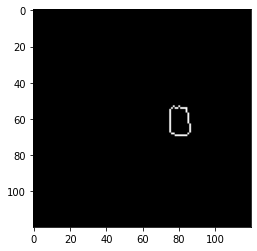

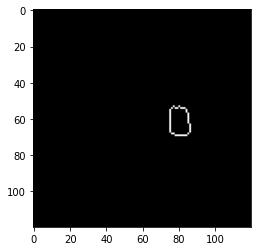

In [ ]:
# 하나씩 보기

plt.imshow(road_partical[2])
plt.show()

plt.imshow(road_partical[3])
plt.show()


# print(np.array(road_partical[1]))

In [ ]:
print(contours_with_filter[2])

[[[77 53]]

 [[76 54]]

 [[75 55]]

 [[75 56]]

 [[75 57]]

 [[75 58]]

 [[75 59]]

 [[75 60]]

 [[75 61]]

 [[75 62]]

 [[75 63]]

 [[75 64]]

 [[75 65]]

 [[75 66]]

 [[75 67]]

 [[76 68]]

 [[77 68]]

 [[78 69]]

 [[79 69]]

 [[80 69]]

 [[81 69]]

 [[82 69]]

 [[83 69]]

 [[84 69]]

 [[85 68]]

 [[86 67]]

 [[86 66]]

 [[86 65]]

 [[86 64]]

 [[86 63]]

 [[85 62]]

 [[85 61]]

 [[85 60]]

 [[85 59]]

 [[85 58]]

 [[85 57]]

 [[84 56]]

 [[84 55]]

 [[84 54]]

 [[83 54]]

 [[82 54]]

 [[81 54]]

 [[80 53]]

 [[79 54]]

 [[78 54]]]


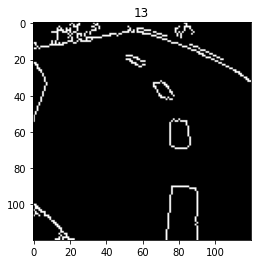

In [ ]:

#잡영 제거 O
i=0
for cnt in contours[:]:
    if len(cnt) >=20:       #잡영 크기 조절
      cv2.drawContours(black_src2, [cnt], 0, (255, 255, 255), 1)     
      i+=1
plt.imshow(black_src2)
plt.title(i)
plt.show()

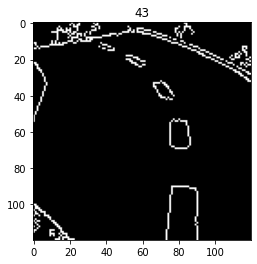

In [ ]:
# 잡영제거 X
i=0
for cnt in contours[:]:
      cv2.drawContours(black_src2, [cnt], 0, (255, 255, 255), 1)     
      i+=1
plt.imshow(black_src2)
plt.title(i)
plt.show()

In [ ]:
#len(contours)

112

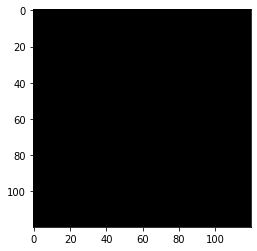

Image load failed!


error: ignored

In [ ]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

data_dir = '/content/xy_049_050_00fe26d0-e5dc-11eb-891f-8c554abddce7.jpg'
black_back = np.zeros((120,120,3),np.uint8)

plt.imshow(black_back)
plt.show()

src = cv2.imread(data_dir, cv2.IMREAD_GRAYSCALE) # 그레이 스케일 영상


if src is None:
    print('Image load failed!')
    exit()




src = cv2.resize(src, dsize=(120, 120))
dst = cv2.Canny(src, 30, 150) # 하단 임계값과 상단 임계값은 실험적으로 결정하기    
plt.imshow( dst,cmap='gray')
plt.show()
cv2.waitKey()

cv2.destroyAllWindows()


contours, hierarchy = cv2.findContours(dst, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
i=0
for cnt in contours:

    if len(cnt)>=20:    # 잡영제거
        
        x,y,w,h = cv2.boundingRect(cnt)   #좌표값


        cv2.drawContours(black_back, [cnt], 0, (255, 255, 255), 1) 
        plt.imshow(black_back,cmap='gray')
        plt.title(i)
        plt.suptitle("length of contours:: {}  :: {}".format(w,h))
        plt.show()
        black_back = np.zeros((120,120,3),np.uint8)
        print(x,y,w,h)
        i+=1

In [ ]:
cv2.imwrite('/content/photo/road_partical_{}.png'.format(i), src)


True

In [ ]:
import time
time.localtime(time.time())

time.struct_time(tm_year=2021, tm_mon=7, tm_mday=14, tm_hour=6, tm_min=17, tm_sec=40, tm_wday=2, tm_yday=195, tm_isdst=0)

In [ ]:
!git clone "https://github.com/Username0515/image.git"

fatal: destination path 'image' already exists and is not an empty directory.
